In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

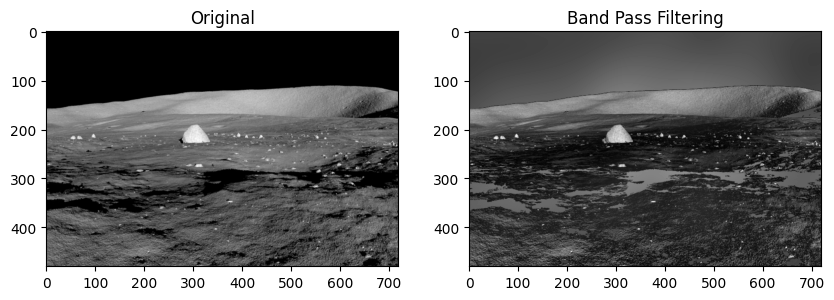

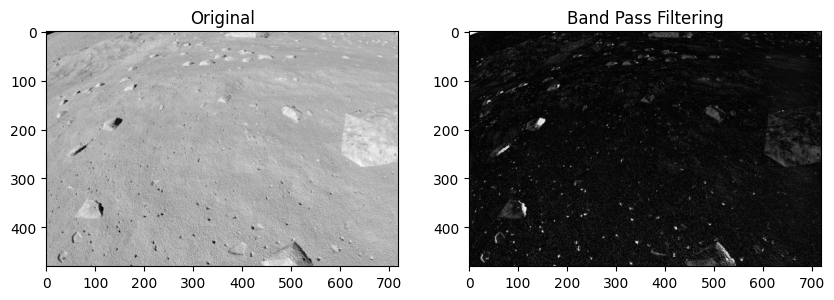

In [3]:
def bandPassFiltering(image, low, high):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols = image.shape
    crow, ccol = int(rows/2), int(cols/2)
    fshift[crow-low:crow+low, ccol-high:ccol+high] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return image, img_back
    
for i in range(2):
    img = cv2.imread(f'./render_new/image{i}.png')
    gray, resultant_image = bandPassFiltering(img, low=1, high=5)
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(resultant_image, cmap='gray'), plt.title('Band Pass Filtering')
    plt.show()

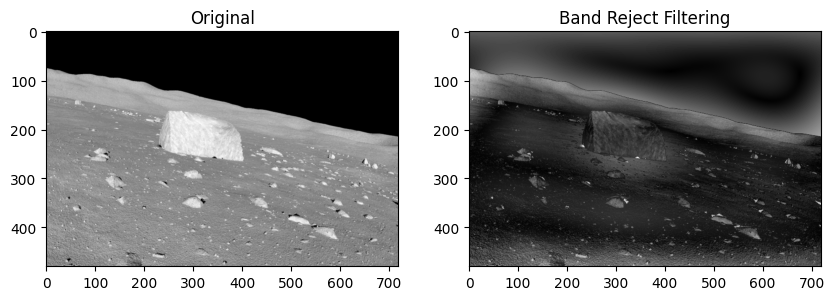

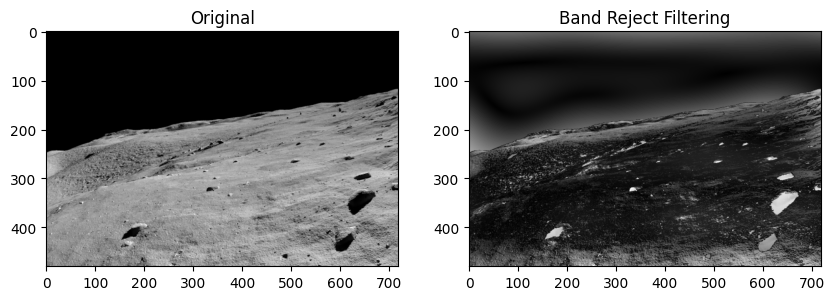

In [4]:
def bandRejectFiltering(image, low, high):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols = image.shape
    crow, ccol = int(rows/2), int(cols/2)
    fshift[crow-low:crow+low, ccol-high:ccol+high] = 255
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return image, img_back

for i in range(15, 17):
    img = cv2.imread(f'./render_new/image{i}.png')
    gray, resultant_image = bandRejectFiltering(img, low=2, high=3)
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(resultant_image, cmap='gray'), plt.title('Band Reject Filtering')
    plt.show()

In [5]:
def rayleigh_noise(img,mean,std):
    noise=np.zeros(img.shape,dtype=np.uint8)
    cv2.randn(noise,mean,std)
    return noise

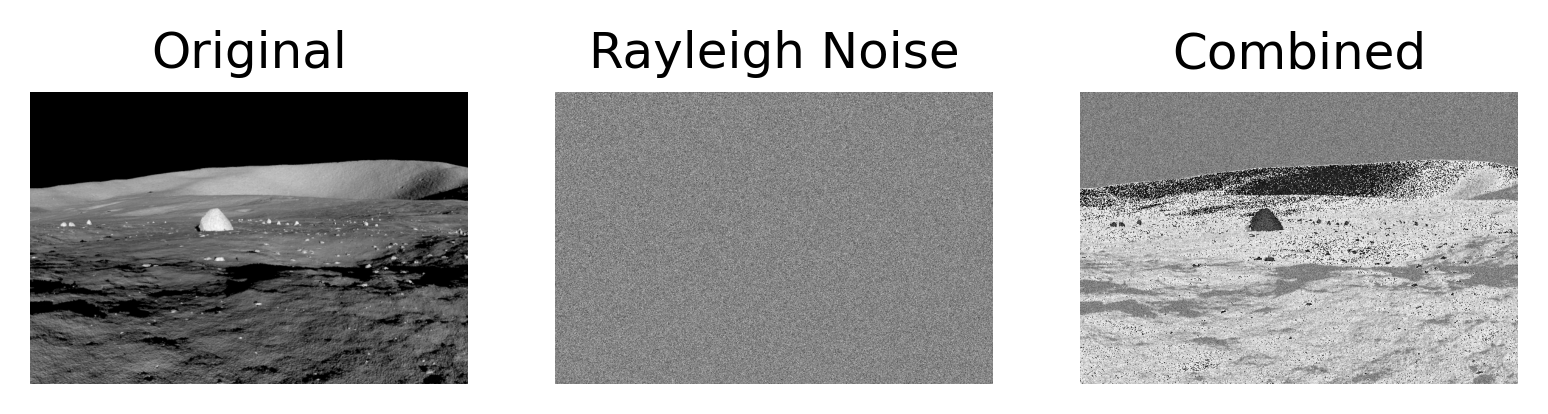

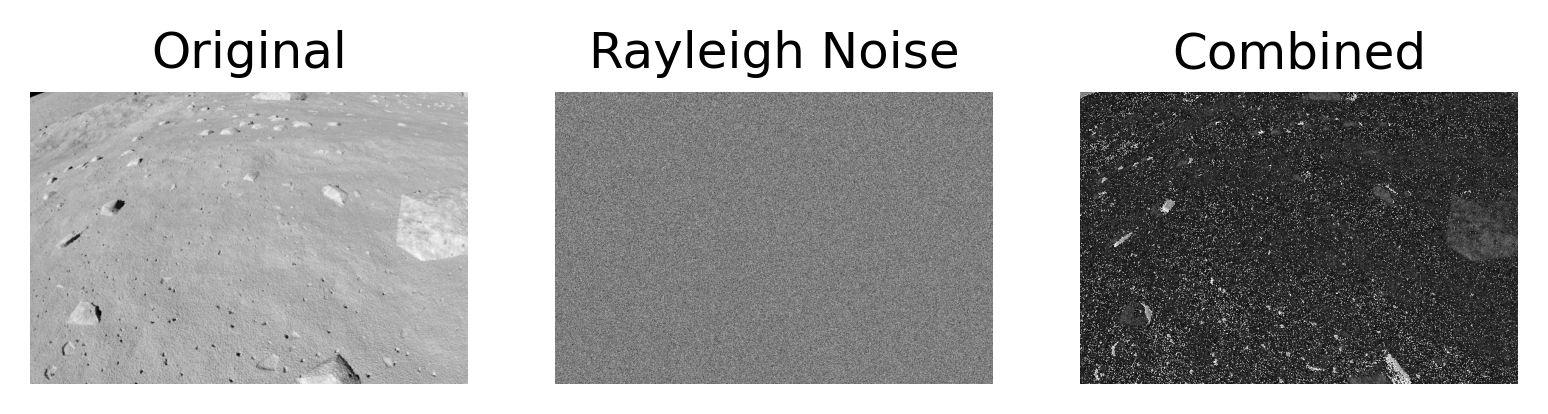

In [6]:
rayleigh_noise_images = []
for i in range(2):
    img=cv2.imread(f"render_new/image{i}.png",0)
    #Rayleigh Noise
    rn_img=img+rayleigh_noise(img,128,20)
    rayleigh_noise_images.append(rn_img)
    fig=plt.figure(dpi=300)
    fig.add_subplot(1,3,1)
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title("Original")

    fig.add_subplot(1,3,2)
    plt.imshow(rayleigh_noise(img,128,20),cmap='gray')
    plt.axis("off")
    plt.title("Rayleigh Noise")

    fig.add_subplot(1,3,3)
    plt.imshow(rn_img,cmap='gray')
    plt.axis("off")
    plt.title("Combined")

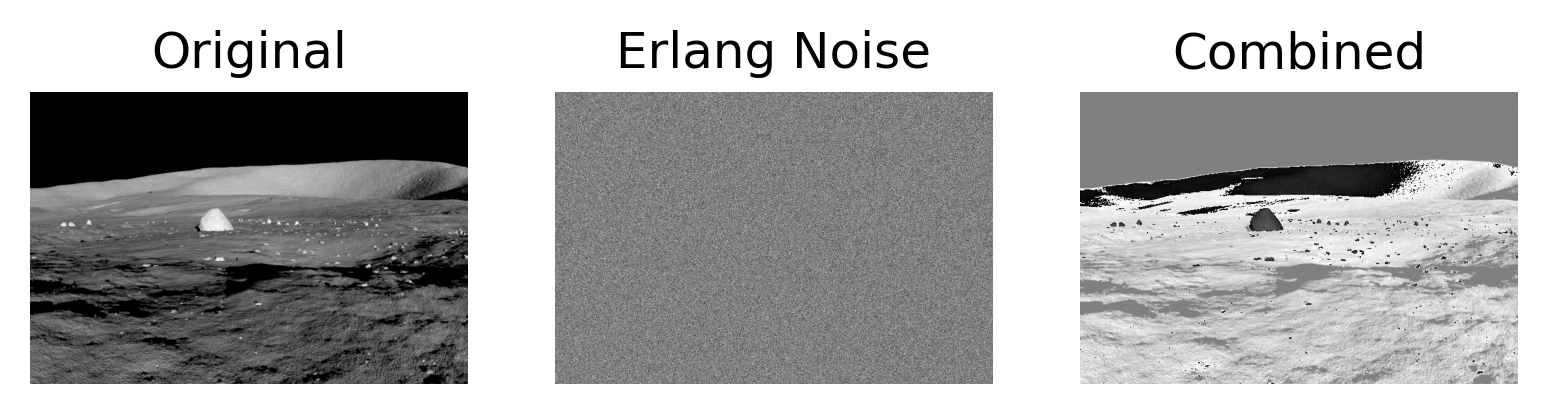

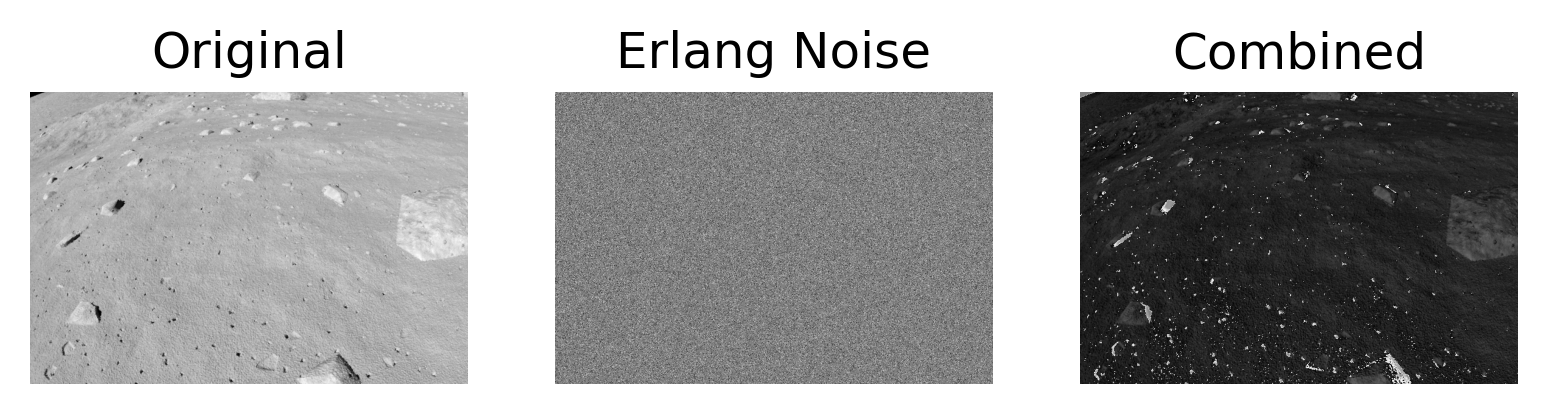

In [7]:
import scipy.stats as stats
def erlang_noise(img):
    erlang_noise = stats.erlang.rvs(5, scale=0.1, size=1000)    
    noise = np.zeros(img.shape, dtype=np.uint8)
    cv2.randn(noise, 128, erlang_noise)
    return noise

for i in range(2):
    img=cv2.imread(f"render_new/image{i}.png",0)
    #Erlang Noise
    en_img=img+erlang_noise(img)
    
    fig=plt.figure(dpi=300)
    fig.add_subplot(1,3,1)
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title("Original")

    fig.add_subplot(1,3,2)
    plt.imshow(erlang_noise(img),cmap='gray')
    plt.axis("off")
    plt.title("Erlang Noise")

    fig.add_subplot(1,3,3)
    plt.imshow(en_img,cmap='gray')
    plt.axis("off")
    plt.title("Combined")